In [14]:
import pandas as pd
import nltk
import pandas as pd 
import re 
import string
from nltk.stem import WordNetLemmatizer  
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import re 
from nltk.sentiment.vader  import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  
from nltk.stem import WordNetLemmatizer   

In [15]:
df = pd.read_json("/Users/mauri/Documents/ReviewScraper/reviewscraper/finale2.json", orient = 'records')

In [16]:
df

,restaurant_name,rating,quote,review,number
0,Bufalero,5.0,Carne top e personale eccellente,Carne spettacolare. Abbiamo provato Galiziana ...,NaN
1,Bufalero,5.0,posto super consigliato,"Cibo ottimo e personale di sala gentilissimo, ...",NaN
2,Bufalero,5.0,Aspettative più che soddisfatte: carni e cottu...,"Tutto perfetto,\ncomplimenti al servizio di Lu...",NaN
3,Bufalero,5.0,"Alte aspettative riservato, servizio top","Tutto perfetto, nota di merito al servizio di ...",NaN
4,Bufalero,5.0,Ottima cena!!,Siamo andati al bufalero e per aspettare per m...,NaN
...,...,...,...,...,...
376268,Hachi Ristorante Giapponese,5.0,Ottimo ristorante,"Il ristorante ha una bella atmosfera, il cibo ...",NaN
376269,Hachi Ristorante Giapponese,5.0,Cibo ottimo servizio super n,Abbiamo ordinato mix tempura e spaghettini con...,NaN
376270,Hachi Ristorante Giapponese,5.0,Best sushi in Napoli!,Cesare & Chef Leonardo ha fatto un ottimo lavo...,NaN
376271,Hachi Ristorante Giapponese,5.0,Amore Ogni Visita,Ho devo dire... questo posto è superlativo. St...,NaN


In [17]:
df = df.drop(df[df['rating'] == 0].index)

In [18]:
df

,restaurant_name,rating,quote,review,number
0,Bufalero,5.0,Carne top e personale eccellente,Carne spettacolare. Abbiamo provato Galiziana ...,NaN
1,Bufalero,5.0,posto super consigliato,"Cibo ottimo e personale di sala gentilissimo, ...",NaN
2,Bufalero,5.0,Aspettative più che soddisfatte: carni e cottu...,"Tutto perfetto,\ncomplimenti al servizio di Lu...",NaN
3,Bufalero,5.0,"Alte aspettative riservato, servizio top","Tutto perfetto, nota di merito al servizio di ...",NaN
4,Bufalero,5.0,Ottima cena!!,Siamo andati al bufalero e per aspettare per m...,NaN
...,...,...,...,...,...
376268,Hachi Ristorante Giapponese,5.0,Ottimo ristorante,"Il ristorante ha una bella atmosfera, il cibo ...",NaN
376269,Hachi Ristorante Giapponese,5.0,Cibo ottimo servizio super n,Abbiamo ordinato mix tempura e spaghettini con...,NaN
376270,Hachi Ristorante Giapponese,5.0,Best sushi in Napoli!,Cesare & Chef Leonardo ha fatto un ottimo lavo...,NaN
376271,Hachi Ristorante Giapponese,5.0,Amore Ogni Visita,Ho devo dire... questo posto è superlativo. St...,NaN


## Recensioni 5 stelle

In [19]:
five_star_reviews = df[df["rating"] == 5]

In [20]:
len(five_star_reviews)

249723

In [21]:
five_star_reviews

,restaurant_name,rating,quote,review,number
0,Bufalero,5.0,Carne top e personale eccellente,Carne spettacolare. Abbiamo provato Galiziana ...,NaN
1,Bufalero,5.0,posto super consigliato,"Cibo ottimo e personale di sala gentilissimo, ...",NaN
2,Bufalero,5.0,Aspettative più che soddisfatte: carni e cottu...,"Tutto perfetto,\ncomplimenti al servizio di Lu...",NaN
3,Bufalero,5.0,"Alte aspettative riservato, servizio top","Tutto perfetto, nota di merito al servizio di ...",NaN
4,Bufalero,5.0,Ottima cena!!,Siamo andati al bufalero e per aspettare per m...,NaN
...,...,...,...,...,...
376267,Hachi Ristorante Giapponese,5.0,"Ottimo cibo, ottimo servizio..Viviana per il p...",Potrebbe essere troppo..ma per noi è il miglio...,NaN
376268,Hachi Ristorante Giapponese,5.0,Ottimo ristorante,"Il ristorante ha una bella atmosfera, il cibo ...",NaN
376269,Hachi Ristorante Giapponese,5.0,Cibo ottimo servizio super n,Abbiamo ordinato mix tempura e spaghettini con...,NaN
376270,Hachi Ristorante Giapponese,5.0,Best sushi in Napoli!,Cesare & Chef Leonardo ha fatto un ottimo lavo...,NaN


In [22]:
five_star_reviews = five_star_reviews.reset_index()

In [23]:
five_star_reviews

,index,restaurant_name,rating,quote,review,number
0,0,Bufalero,5.0,Carne top e personale eccellente,Carne spettacolare. Abbiamo provato Galiziana ...,NaN
1,1,Bufalero,5.0,posto super consigliato,"Cibo ottimo e personale di sala gentilissimo, ...",NaN
2,2,Bufalero,5.0,Aspettative più che soddisfatte: carni e cottu...,"Tutto perfetto,\ncomplimenti al servizio di Lu...",NaN
3,3,Bufalero,5.0,"Alte aspettative riservato, servizio top","Tutto perfetto, nota di merito al servizio di ...",NaN
4,4,Bufalero,5.0,Ottima cena!!,Siamo andati al bufalero e per aspettare per m...,NaN
...,...,...,...,...,...,...
249718,376267,Hachi Ristorante Giapponese,5.0,"Ottimo cibo, ottimo servizio..Viviana per il p...",Potrebbe essere troppo..ma per noi è il miglio...,NaN
249719,376268,Hachi Ristorante Giapponese,5.0,Ottimo ristorante,"Il ristorante ha una bella atmosfera, il cibo ...",NaN
249720,376269,Hachi Ristorante Giapponese,5.0,Cibo ottimo servizio super n,Abbiamo ordinato mix tempura e spaghettini con...,NaN
249721,376270,Hachi Ristorante Giapponese,5.0,Best sushi in Napoli!,Cesare & Chef Leonardo ha fatto un ottimo lavo...,NaN


In [24]:
five_star_string = ""

for i in range(50000):
    if i%2500==0:
        print(i)
    if five_star_reviews["review"][i] is not None:
        five_star_string = five_star_string + " " + five_star_reviews["review"][i]

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500


In [25]:
#Rimozione punteggiatura (sostituita con uno spazio)
five_star_string = re.sub(r'[^\w\s]', ' ', five_star_string)

In [26]:
#A volte c'è più di uno spazio di seguito, ne vogliamo al massimo uno
five_star_string = re.sub(r'\s{2,}', ' ', five_star_string)

In [27]:
print(five_star_string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
#Creazione tokenizzatore
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [29]:
#Tokenizing the text
tokens = tokenizer.tokenize(five_star_string)
len(tokens)

1641688

In [30]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

lower_tokens = []

# Looping through the tokens and make them lower case
for token in tokens:
    lower_tokens.append(token.lower())

In [31]:
#nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('italian')

In [32]:
stopwords

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [33]:
final_tokens=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for token in lower_tokens:
    if token not in stopwords:
        final_tokens.append(token)

In [34]:
import simplemma
from simplemma import is_known

In [35]:
myword='belli'
myword=simplemma.lemmatize(myword, lang='it')
print(myword)

bello


In [36]:
lem_tokens=[]

for token in final_tokens:
    token = simplemma.lemmatize(token, lang='it')
    lem_tokens.append(token)

In [37]:
token_freq = nltk.FreqDist(lem_tokens)

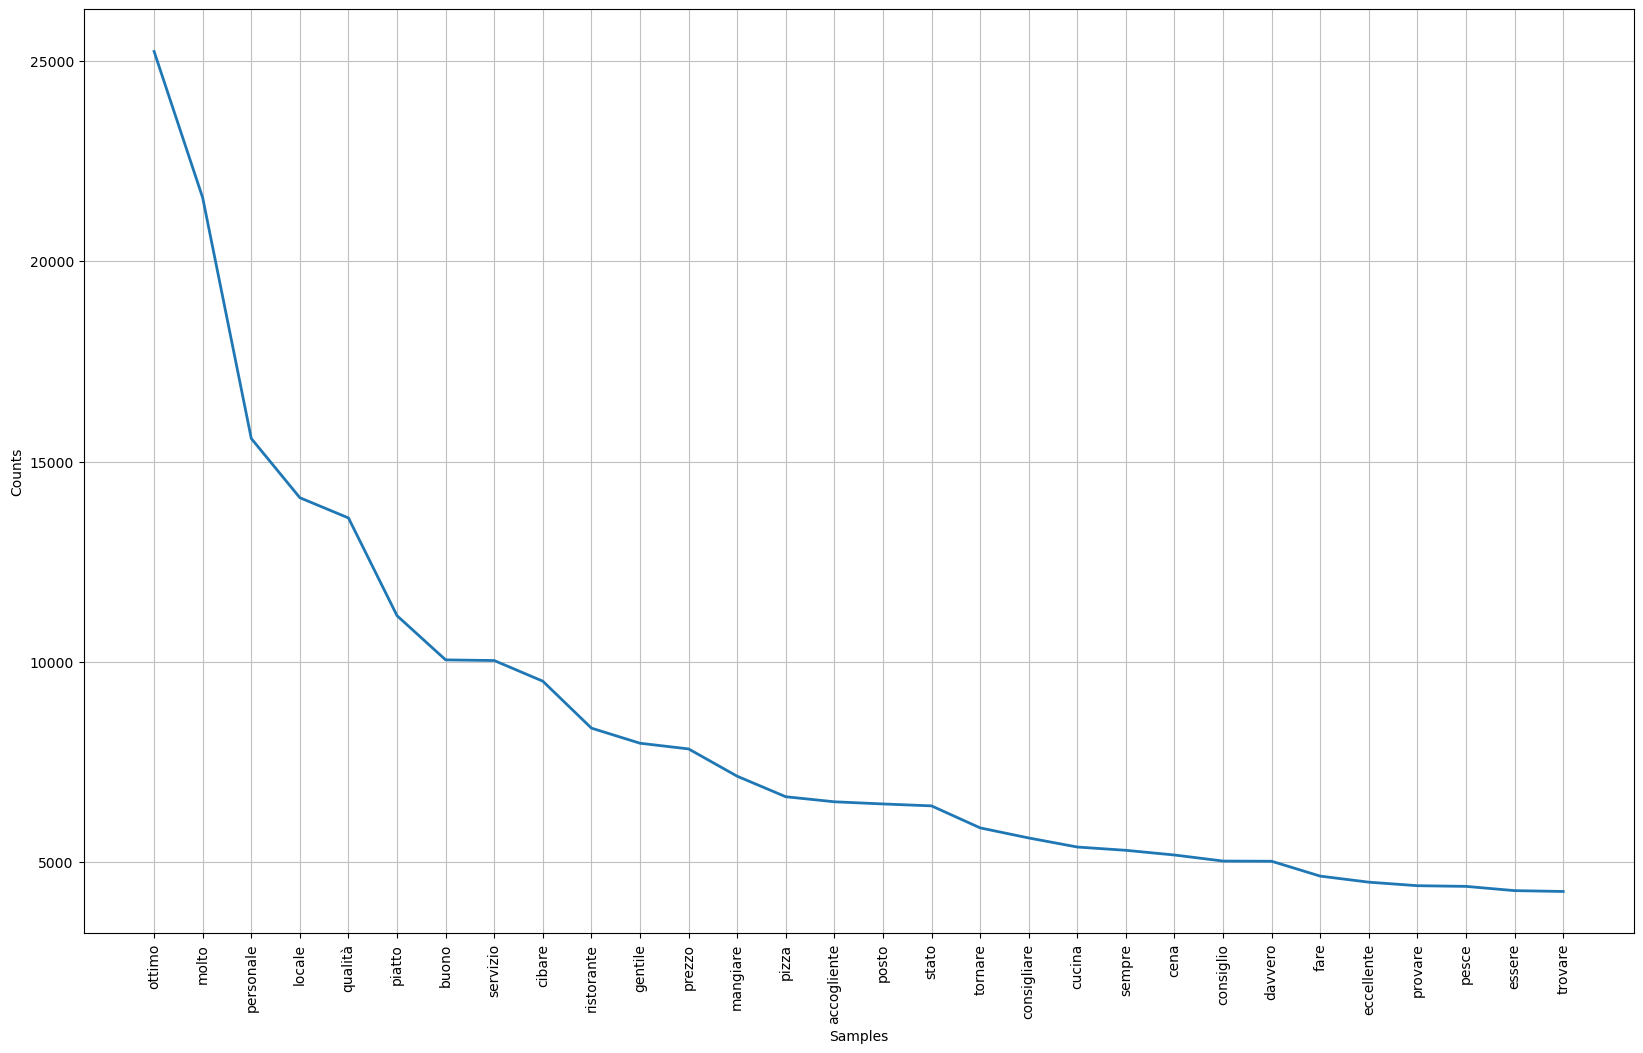

<Axes: xlabel='Samples', ylabel='Counts'>

In [38]:
plt.subplots(figsize=(20,12))
token_freq.plot(30)

In [ ]:
del 

## Recensioni 4 stelle

In [39]:
four_star_reviews = df[df["rating"] == 4]

In [40]:
four_star_reviews = four_star_reviews.reset_index()

In [41]:
len(four_star_reviews)

86365

In [42]:
four_star_string = ""

for i in range(50000):
    if(i%2500==0):
        print(i)
    if four_star_reviews["review"][i] is not None:
        four_star_string = four_star_string + " " + four_star_reviews["review"][i]

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500


In [43]:
#Rimozione punteggiatura (sostituita con uno spazio)
four_star_string = re.sub(r'[^\w\s]', ' ', four_star_string)

In [44]:
#A volte c'è più di uno spazio di seguito, ne vogliamo al massimo uno
four_star_string = re.sub(r'\s{2,}', ' ', four_star_string)

In [45]:
#Tokenizing the text
four_tokens = tokenizer.tokenize(four_star_string)
len(four_tokens)

2118015

In [46]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

four_lower_tokens = []

# Looping through the tokens and make them lower case
for token in four_tokens:
    four_lower_tokens.append(token.lower())

In [47]:
four_final_tokens=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for token in four_lower_tokens:
    if token not in stopwords:
        four_final_tokens.append(token)

In [48]:
four_lem_tokens=[]

for token in four_final_tokens:
    token = simplemma.lemmatize(token, lang='it')
    four_lem_tokens.append(token)

In [49]:
four_token_freq = nltk.FreqDist(four_lem_tokens)

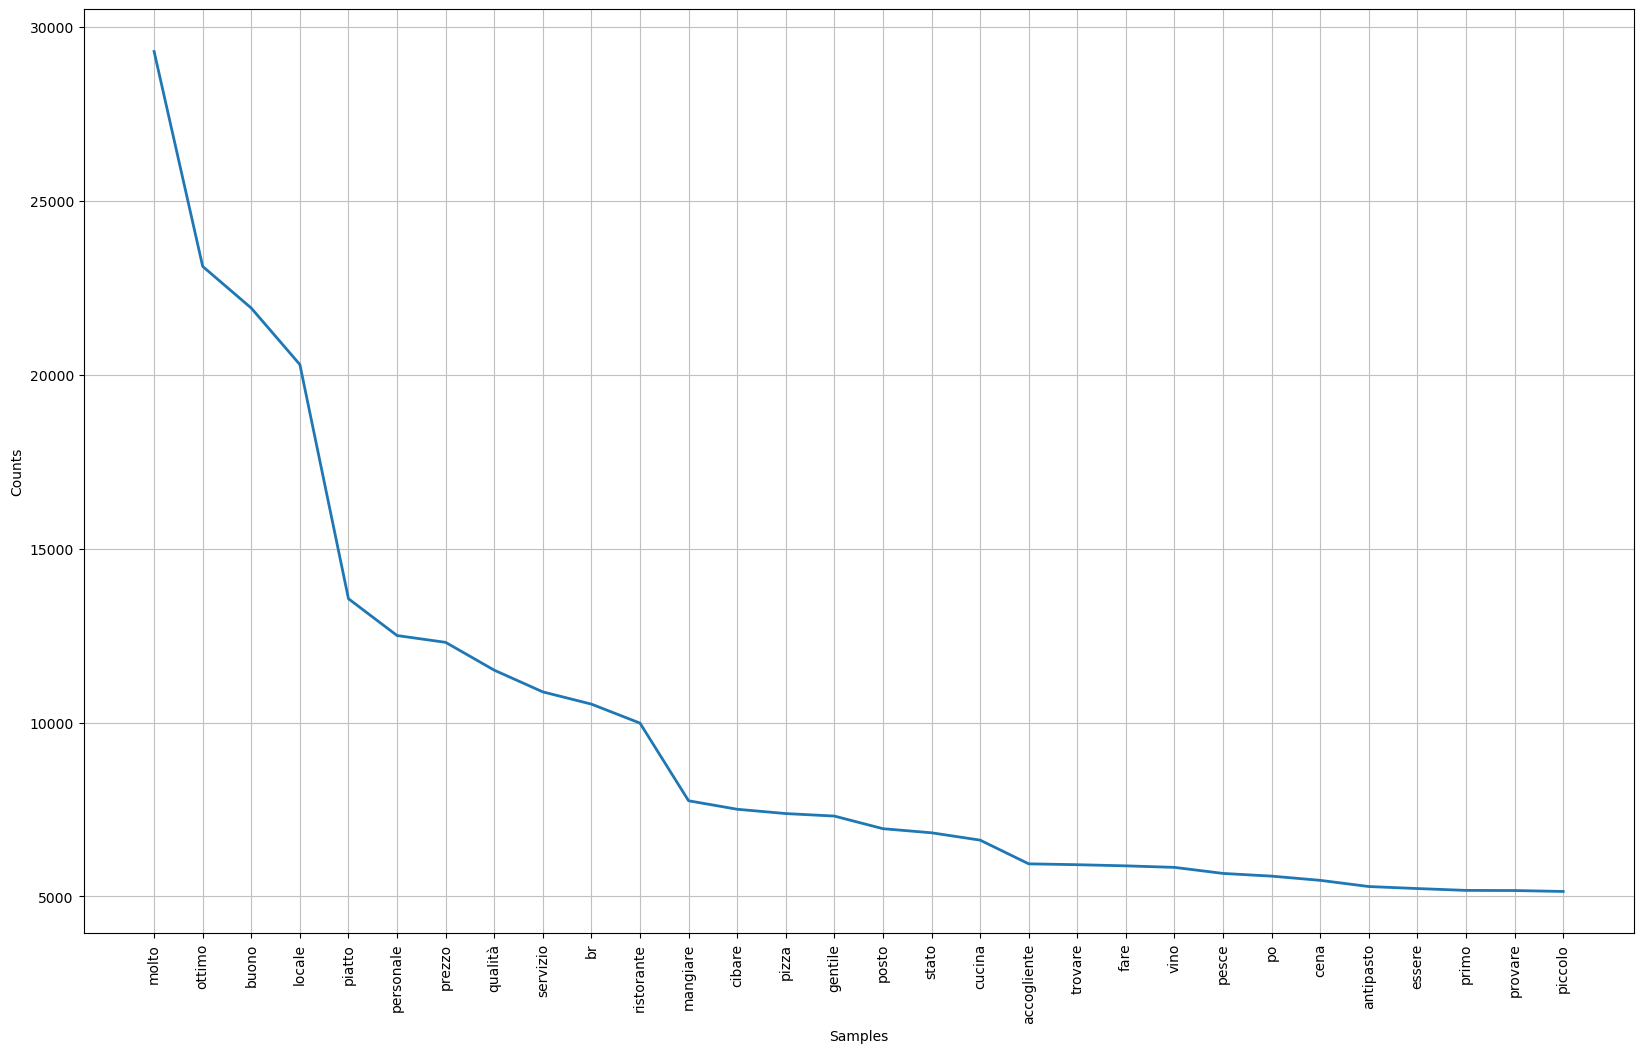

<Axes: xlabel='Samples', ylabel='Counts'>

In [50]:
plt.subplots(figsize=(20,12))
four_token_freq.plot(30)

## Recensioni 3 stelle

In [51]:
three_star_reviews = df[df["rating"] == 3]

In [52]:
three_star_reviews = three_star_reviews.reset_index()

In [89]:
len(three_star_reviews)

24198

In [54]:
three_star_string = ""

for i in range(len(three_star_reviews)):
    if three_star_reviews["review"][i] is not None:
        three_star_string = three_star_string + " " + three_star_reviews["review"][i]

In [55]:
#Rimozione punteggiatura (sostituita con uno spazio)
three_star_string = re.sub(r'[^\w\s]', ' ', three_star_string)

In [56]:
#A volte c'è più di uno spazio di seguito, ne vogliamo al massimo uno
three_star_string = re.sub(r'\s{2,}', ' ', three_star_string)

In [57]:
#Tokenizing the text
three_tokens = tokenizer.tokenize(three_star_string)
len(three_tokens)

1117362

In [58]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

three_lower_tokens = []

# Looping through the tokens and make them lower case
for token in three_tokens:
    three_lower_tokens.append(token.lower())

In [59]:
three_final_tokens=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for token in three_lower_tokens:
    if token not in stopwords:
        three_final_tokens.append(token)

In [60]:
three_lem_tokens=[]

for token in three_final_tokens:
    token = simplemma.lemmatize(token, lang='it')
    three_lem_tokens.append(token)

In [61]:
three_token_freq = nltk.FreqDist(three_lem_tokens)

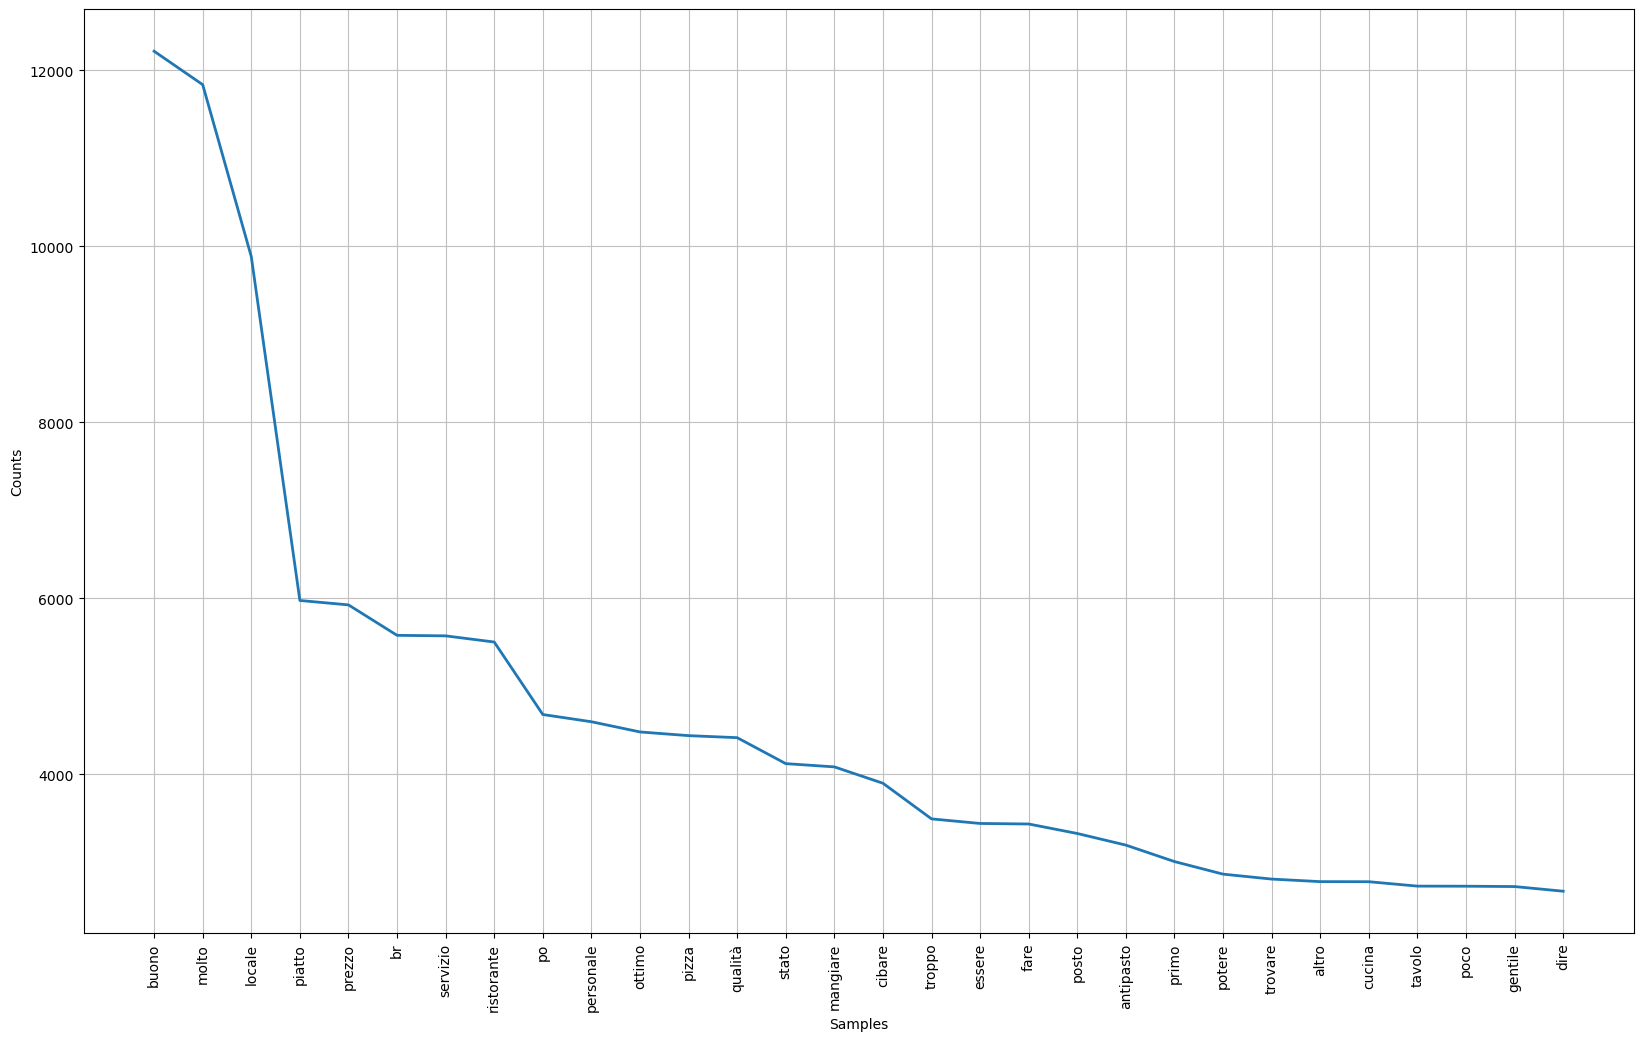

<Axes: xlabel='Samples', ylabel='Counts'>

In [62]:
plt.subplots(figsize=(20,12))
three_token_freq.plot(30)

## Recensioni 2 stelle

In [63]:
two_star_reviews = df[df["rating"] == 2]

In [64]:
two_star_reviews = two_star_reviews.reset_index()

In [88]:
len(two_star_reviews)

9046

In [66]:
two_star_string = ""

for i in range(len(two_star_reviews)):
    if two_star_reviews["review"][i] is not None:
        two_star_string = two_star_string + " " + two_star_reviews["review"][i]

In [67]:
#Rimozione punteggiatura (sostituita con uno spazio)
two_star_string = re.sub(r'[^\w\s]', ' ', two_star_string)

In [68]:
#A volte c'è più di uno spazio di seguito, ne vogliamo al massimo uno
two_star_string = re.sub(r'\s{2,}', ' ', two_star_string)

In [69]:
#Tokenizing the text
two_tokens = tokenizer.tokenize(two_star_string)
len(two_tokens)

428501

In [70]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

two_lower_tokens = []

# Looping through the tokens and make them lower case
for token in two_tokens:
    two_lower_tokens.append(token.lower())

In [71]:
two_final_tokens=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for token in two_lower_tokens:
    if token not in stopwords:
        two_final_tokens.append(token)

In [72]:
two_lem_tokens=[]

for token in two_final_tokens:
    token = simplemma.lemmatize(token, lang='it')
    two_lem_tokens.append(token)

In [73]:
two_token_freq = nltk.FreqDist(two_lem_tokens)

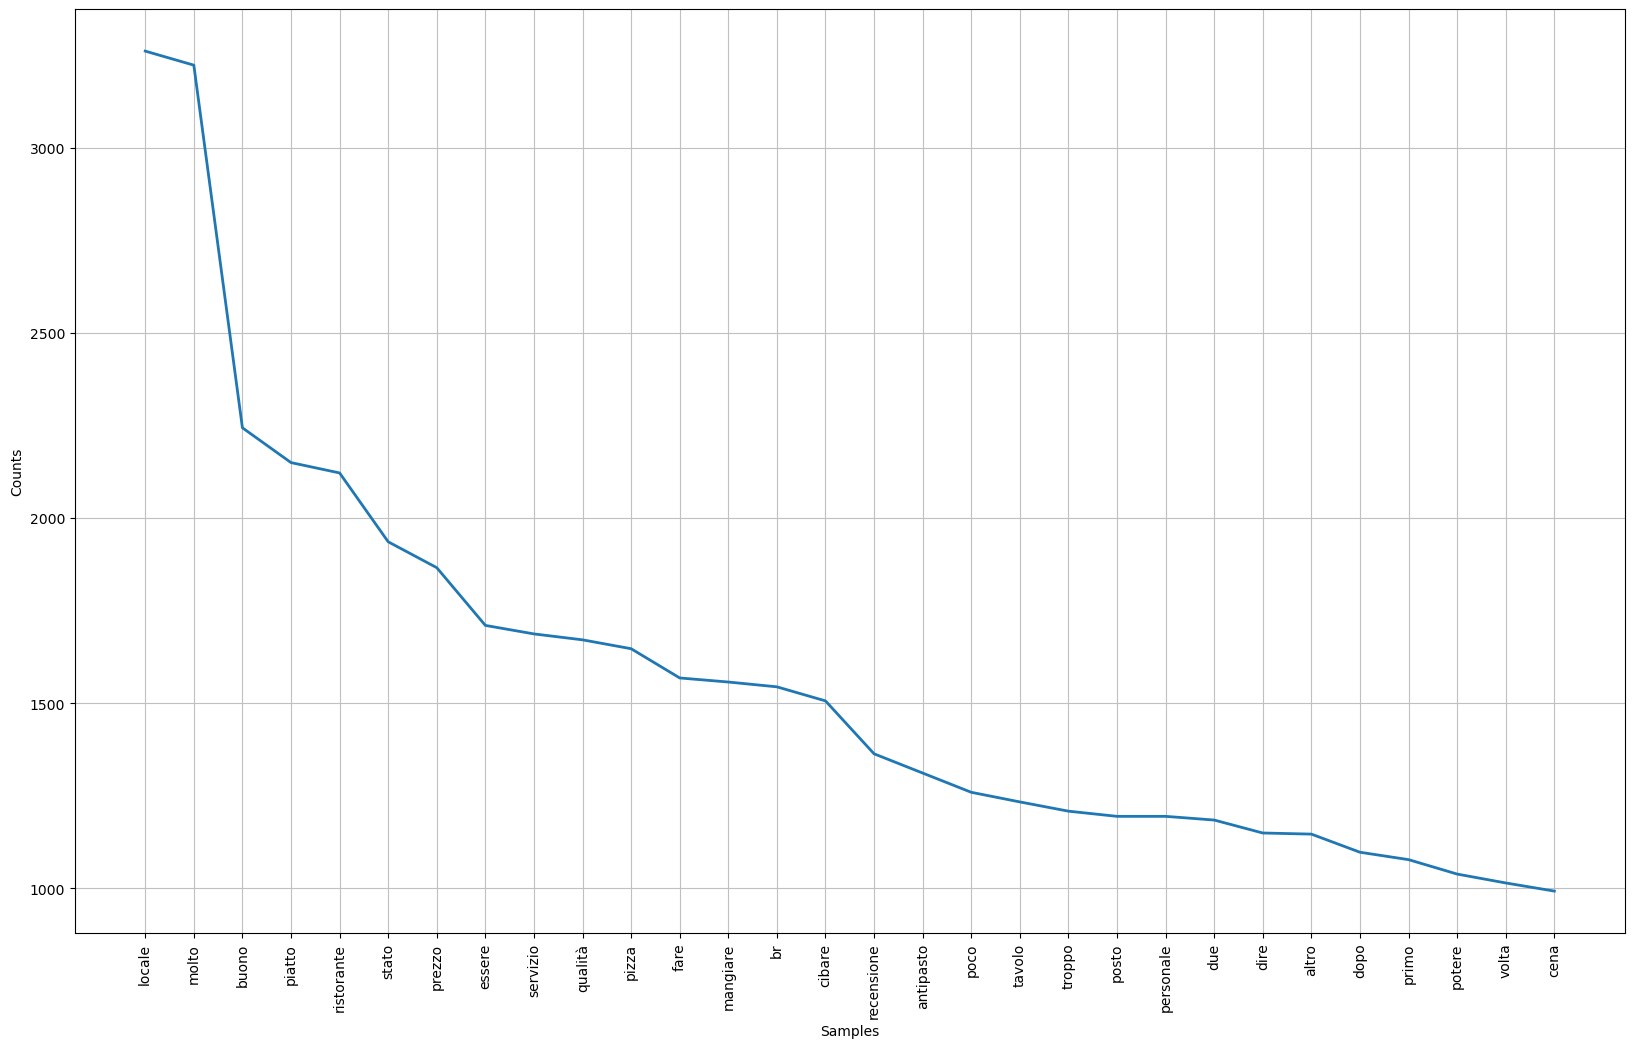

<Axes: xlabel='Samples', ylabel='Counts'>

In [74]:
plt.subplots(figsize=(20,12))
two_token_freq.plot(30)

## Recensioni 1 stelle

In [75]:
one_star_reviews = df[df["rating"] == 1]

In [76]:
one_star_reviews = one_star_reviews.reset_index()

In [87]:
len(one_star_reviews)

6846

In [78]:
one_star_string = ""

for i in range(len(one_star_reviews)):
    if one_star_reviews["review"][i] is not None:
        one_star_string = one_star_string + " " + one_star_reviews["review"][i]

In [79]:
#Rimozione punteggiatura (sostituita con uno spazio)
one_star_string = re.sub(r'[^\w\s]', ' ', one_star_string)

In [80]:
#A volte c'è più di uno spazio di seguito, ne vogliamo al massimo uno
one_star_string = re.sub(r'\s{2,}', ' ', one_star_string)

In [81]:
#Tokenizing the text
one_tokens = tokenizer.tokenize(one_star_string)
len(one_tokens)

298922

In [82]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

one_lower_tokens = []

# Looping through the tokens and make them lower case
for token in one_tokens:
    one_lower_tokens.append(token.lower())

In [83]:
one_final_tokens=[]

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for token in one_lower_tokens:
    if token not in stopwords:
        one_final_tokens.append(token)

In [84]:
one_lem_tokens=[]

for token in one_final_tokens:
    token = simplemma.lemmatize(token, lang='it')
    one_lem_tokens.append(token)

In [85]:
one_token_freq = nltk.FreqDist(one_lem_tokens)

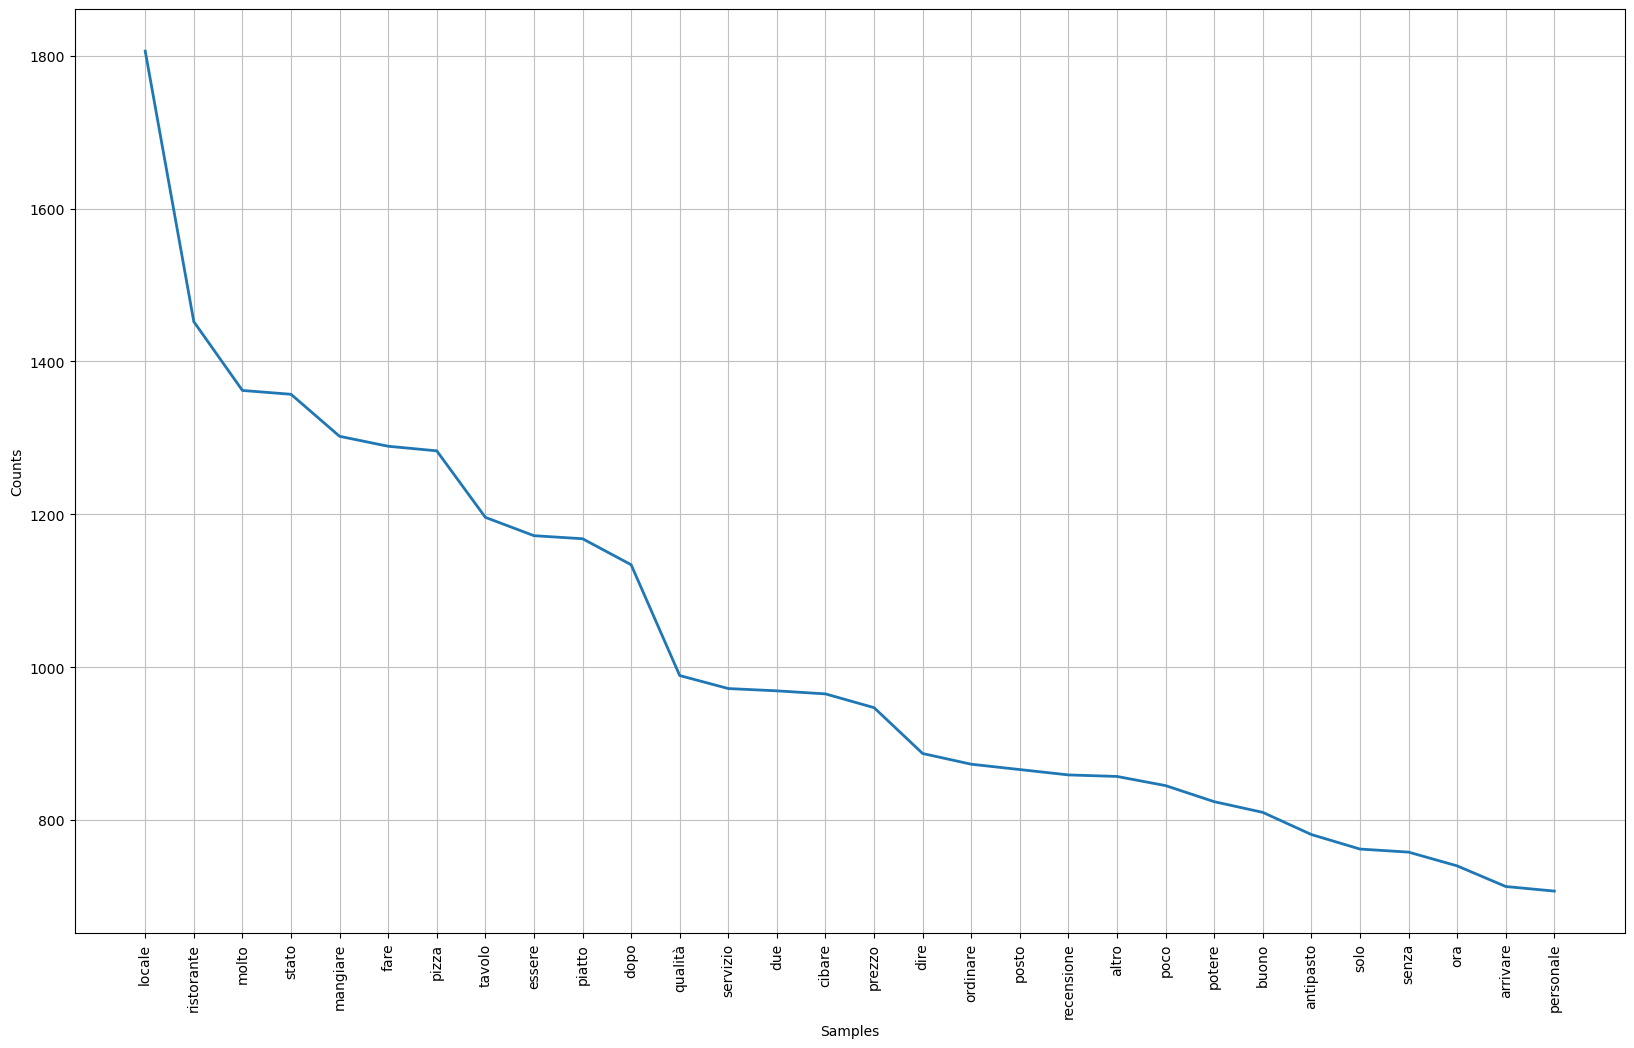

<Axes: xlabel='Samples', ylabel='Counts'>

In [86]:
plt.subplots(figsize=(20,12))
one_token_freq.plot(30)